In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [57]:
data = pd.read_csv("Iris.csv")
data = data.sample(frac=1, random_state=42)

In [58]:
feature_columns = data.columns[:4]
feature_columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], dtype='object')

In [59]:
def normalize(df):
    new_df = df.copy()
    for col in feature_columns:
        new_df[col] -= df[col].mean()
        new_df[col] /= df[col].std()
    return new_df

In [60]:
data_normalized = normalize(data)

In [61]:
categories = np.unique(data["Class"])
colors = ['red', 'yellow', 'blue']
colordict = dict(zip(categories, colors))  

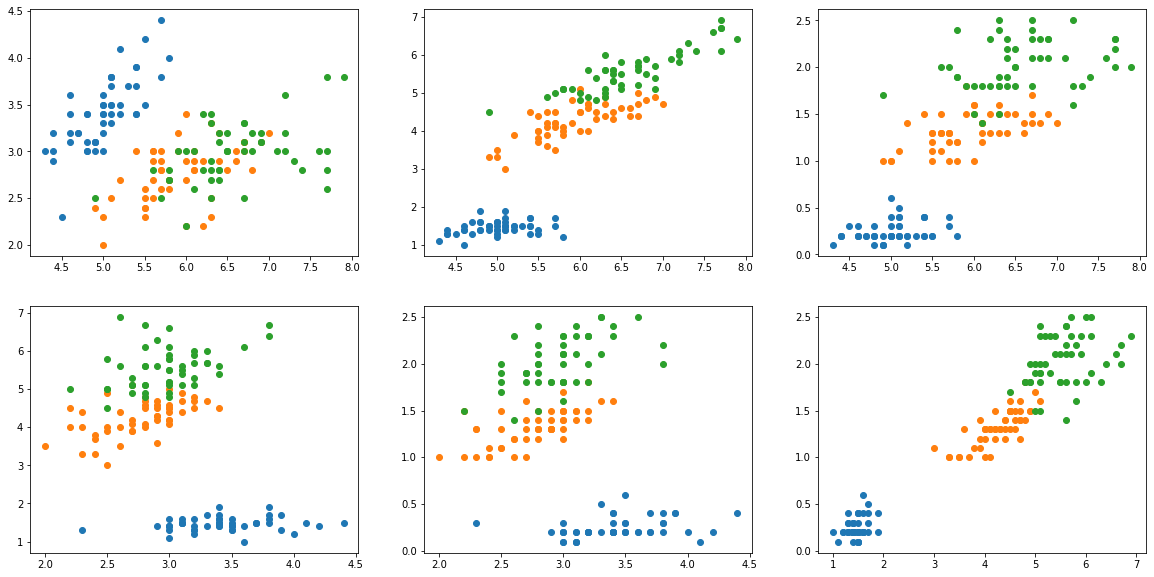

In [62]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
axes = axes.flat
groups = data.groupby("Class")
columns = data.columns
plot_columns = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]

for i,p in enumerate(plot_columns):
    for name, group in groups:
        axes[i].plot(group[columns[p[0]]], group[columns[p[1]]], marker="o", linestyle="", label=name)

In [63]:
def train_test_splitter(data_to_split):
    split_point =  int(0.8 * len(data_to_split))
    X_train = data_to_split.iloc[:split_point, [0,1,2,3]]
    y_train =  data_to_split.iloc[:split_point, [-1]]
    X_test = data_to_split.iloc[split_point:, [0,1,2,3]]
    y_test = data_to_split.iloc[split_point:, [-1]]
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_splitter(data)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_splitter(data_normalized)

In [64]:
class_idx = {}
for i,c in enumerate(categories):
    class_idx[c] = i
class_idx

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [65]:
def nn_classify(X_train, X_test, y_train, y_test):
    
    conf_mtx = np.zeros((3,3))
    corrects = 0
    
    for i, _ in X_test.iterrows():
        diffs = X_train.loc[:, feature_columns] - X_test.loc[i, feature_columns].squeeze(0)
        nearest_index = diffs.pow(2).sum(axis=1).idxmin()
        
        prediction = y_train.loc[nearest_index, 'Class']
        real_class = y_test.loc[i, 'Class']
        
        conf_mtx[class_idx[prediction]][class_idx[real_class]] += 1
        
        if prediction == y_test.loc[i, 'Class']:
            corrects += 1
        
    accuracy = corrects/len(X_test) * 100
    return accuracy, conf_mtx

In [66]:
accuracy, conf_mtx = nn_classify(X_train, X_test, y_train, y_test)

In [67]:
accuracy

96.66666666666667

In [68]:
accuracy, conf_mtx = nn_classify(X_train_normal, X_test_normal, y_train_normal, y_test_normal)

In [69]:
accuracy

96.66666666666667

In [70]:
precisions = []
recalls = []
f1 = []

In [71]:
for i in range(len(categories)):
    precision = conf_mtx[i][i] / conf_mtx.sum(axis=1)[i]
    precisions.append(precision)
    recall = conf_mtx[i][i] / conf_mtx.sum(axis=0)[i]
    recalls.append(recall)
    f1.append(2 * (precision * recall) / (precision + recall))

In [72]:
precisions

[1.0, 0.9166666666666666, 1.0]

In [73]:
recalls

[1.0, 1.0, 0.9166666666666666]

In [74]:
f1

[1.0, 0.9565217391304348, 0.9565217391304348]

# Using Sklearn

In [75]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsClassifier

In [91]:
data = pd.read_csv("Iris.csv")

In [92]:
X = data[feature_columns]
y = data['Class']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)

In [101]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [102]:
knn.score(X_test, y_test)

0.9666666666666667

In [103]:
data_normalized = normalize(data)
X = data_normalized[feature_columns]
y = data_normalized['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

In [104]:
data.sample(frac=1)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
91,6.1,3.0,4.6,1.4,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
5,5.4,3.9,1.7,0.4,Iris-setosa
114,5.8,2.8,5.1,2.4,Iris-virginica
...,...,...,...,...,...
33,5.5,4.2,1.4,0.2,Iris-setosa
68,6.2,2.2,4.5,1.5,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [105]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
